In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import time
import plotly.express as px

Data Preprocessing

In [64]:
data = pd.read_csv('../dataset/old.csv', sep=',')
data

Name  e_magic  e_cblp  e_cp  \
0      VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3   
1      VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3   
2      VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3   
3      VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3   
4      VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3   
...                                            ...      ...     ...   ...   
19606                                     clip.exe    23117     144     3   
19607                 VNC-Server-6.2.0-Windows.exe    23117     144     3   
19608      Microsoft.GroupPolicy.Management.ni.dll    23117       0     0   
19609                            cryptuiwizard.dll    23117     144     3   
19610                                  winhttp.dll    23117     144     3   

       e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  \
0           0          4           0       65535     0   184  ...   
1           0          4           0       65535     0   184  ...   
2           0          4           0       65535     0   184  ...   
3           0          4           0       65535     0   184  ...   
4           0          4           0       65535     0   184  ...   
...       ...        ...         ...         ...   ...   ...  ...   
19606       0          4           0       65535     0   184  ...   
19607       0          4           0       65535     0   184  ...   
19608       0          0           0           0     0     0  ...   
19609       0          4           0       65535     0   184  ...   
19610       0          4           0       65535     0   184  ...   

       SizeOfHeapReserve  SizeOfHeapCommit  LoaderFlags  NumberOfRvaAndSizes  \
0                1048576              4096            0                   16   
1                1048576              4096            0                   16   
2                1048576             69632            0                  528   
3                1048576              4096            0                   16   
4                1048576              4096            0                   16   
...                  ...               ...          ...                  ...   
19606            1048576              4096            0                   16   
19607            1048576              4096            0                   16   
19608                  0                 0            0                   16   
19609            1048576              4096            0                   16   
19610            1048576              4096            0                   16   

       Malware  ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0            1                          0                      54440   
1            1                          0                     262276   
2            1                          0                      36864   
3            1                          0                     356352   
4            1                          0                      61440   
...        ...                        ...                        ...   
19606        0                          0                      24948   
19607        0                          0                    1413420   
19608        0                          0                          0   
19609        0                      89008                      94904   
19610        0                       8348                     545812   

       ImageDirectoryEntryResource  ImageDirectoryEntryException  \
0                            77824                         73728   
1                           294912                             0   
2                            40960                             0   
3                          1003520                             0   
4                            73728                             0   
...                            ...                        

In [65]:
data.groupby(data['Malware']).size()

Malware
0     5012
1    14599
dtype: int64

In [66]:
data = pd.read_csv('../dataset/old.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
XX = data.drop(['Name','Malware','TimeDateStamp','ImageDirectoryEntryExport', 'ImageDirectoryEntryImport',
	       'ImageDirectoryEntryResource', 'ImageDirectoryEntryException',
	       'ImageDirectoryEntrySecurity'], axis=1)
yy = data['Malware']
X_trainn, X_testt, y_trainn, y_testt= train_test_split(XX,yy, test_size=0.2, random_state=101)
X_trainn.head()

e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
11441    23117     144     3       0          4           0       65535     0   
2624     23117     144     3       0          4           0       65535     0   
18874    23117     144     3       0          4           0       65535     0   
16415    23117     144     3       0          4           0       65535     0   
11179    23117     144     3       0          4           0       65535     0   

       e_sp  e_csum  ...    CheckSum  SizeOfImage  Subsystem  \
11441   184       0  ...      519381       528384          2   
2624    184       0  ...      132461       135168          2   
18874   184       0  ...      235770       258048          2   
16415   184       0  ...   117248729       618496          2   
11179   184       0  ...  2018594456       737280          2   

       DllCharacteristics  SizeOfStackReserve  SizeOfStackCommit  \
11441               33088              524288              69632   
2624                    0             1048576               4096   
18874                 320              262144               4096   
16415               34112             1048576               4096   
11179               33088             1048576               4096   

       SizeOfHeapReserve  SizeOfHeapCommit  LoaderFlags  NumberOfRvaAndSizes  
11441            1048576              4096            0                   16  
2624             1048576              4096            0                   16  
18874            1048576              4096            0                   16  
16415            1048576              4096            0                   16  
11179            1048576              4096            0                   16  

[5 rows x 51 columns]

In [67]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(XX.dtypes)

e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
e_cparhdr                        int64
e_minalloc                       int64
e_maxalloc                       int64
e_ss                             int64
e_sp                             int64
e_csum                           int64
e_ip                             int64
e_cs                             int64
e_lfarlc                         int64
e_ovno                           int64
e_oemid                          int64
e_oeminfo                        int64
e_lfanew                         int64
Machine                          int64
NumberOfSections                 int64
PointerToSymbolTable             int64
NumberOfSymbols                  int64
SizeOfOptionalHeader             int64
Characteristics                  int64
Magic                            int64
MajorLinkerVersion               int64
MinorLinkerVersion       

Standard Scaler

In [68]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_trainn)
X_new = pd.DataFrame(X_scaled, columns=XX.columns)
X_new.head()

e_magic    e_cblp      e_cp    e_crlc  e_cparhdr  e_minalloc  e_maxalloc  \
0      0.0 -0.038591 -0.050297 -0.041557  -0.040212   -0.042419    0.148298   
1      0.0 -0.038591 -0.050297 -0.041557  -0.040212   -0.042419    0.148298   
2      0.0 -0.038591 -0.050297 -0.041557  -0.040212   -0.042419    0.148298   
3      0.0 -0.038591 -0.050297 -0.041557  -0.040212   -0.042419    0.148298   
4      0.0 -0.038591 -0.050297 -0.041557  -0.040212   -0.042419    0.148298   

       e_ss      e_sp    e_csum  ...  CheckSum  SizeOfImage  Subsystem  \
0 -0.016139 -0.036843 -0.031918  ... -0.231964    -0.030482  -0.349626   
1 -0.016139 -0.036843 -0.031918  ... -0.232748    -0.041795  -0.349626   
2 -0.016139 -0.036843 -0.031918  ... -0.232539    -0.038260  -0.349626   
3 -0.016139 -0.036843 -0.031918  ...  0.004331    -0.027890  -0.349626   
4 -0.016139 -0.036843 -0.031918  ...  3.853226    -0.024473  -0.349626   

   DllCharacteristics  SizeOfStackReserve  SizeOfStackCommit  \
0            0.915324           -0.397598           1.231926   
1           -1.100996           -0.017011          -0.063494   
2           -1.081495           -0.587891          -0.063494   
3            0.977725           -0.017011          -0.063494   
4            0.915324           -0.017011          -0.063494   

   SizeOfHeapReserve  SizeOfHeapCommit  LoaderFlags  NumberOfRvaAndSizes  
0           -0.01792         -0.032034    -0.023774            -0.008716  
1           -0.01792         -0.032034    -0.023774            -0.008716  
2           -0.01792         -0.032034    -0.023774            -0.008716  
3           -0.01792         -0.032034    -0.023774            -0.008716  
4           -0.01792         -0.032034    -0.023774            -0.008716  

[5 rows x 51 columns]

PCA

In [69]:
skpca = PCA(n_components=35)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])
print('Shape before PCA: ', X_new.shape)
print('Shape after PCA: ', X_pca.shape)

Variance sum :  0.9575582690568354
Shape before PCA:  (15688, 51)
Shape after PCA:  (15688, 35)


In [70]:
exp_var_cumul = np.cumsum(skpca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"})

In [71]:
pca_df = pd.DataFrame(data = X_pca)
pca_df["Malware"] = data["Malware"]
pca_df

0         1         2         3         4         5         6  \
0     -0.235358 -0.214219  4.314726  0.895634  0.596657 -1.081957 -0.858326   
1     -0.162889 -0.098305 -1.289567 -0.477140 -0.182964  0.487041  0.493762   
2     -0.245171 -0.050226 -0.012242  0.085250  0.201624 -0.336817  0.052818   
3     -0.241555 -0.151168 -0.878993 -0.132663 -0.007798  0.216699  0.011013   
4     -0.316046  0.095018 -0.681642  0.052885  0.447312 -0.208975 -0.203760   
...         ...       ...       ...       ...       ...       ...       ...   
15683 -0.133604 -0.214524  3.750727  0.457066 -0.839321  0.969238  0.530634   
15684 -0.237581 -0.160909 -0.861183 -0.137307 -0.020667  0.224632  0.019804   
15685 -0.064112 -0.122719  4.600081  0.879351 -0.012927 -0.578321  0.057344   
15686 -0.200061 -0.070168  0.286155  0.227950 -0.127093  0.050283  0.556925   
15687  0.337495 -0.268574 -0.795627  1.106951 -1.748569  1.748351 -3.548690   

              7         8         9  ...        26        27        28  \
0      0.236178 -0.705838  0.080304  ...  0.028106  0.636241 -0.103642   
1      1.236010  2.572384 -0.043606  ...  0.031548  0.152002 -0.117269   
2     -0.215904  0.484660 -0.817566  ...  0.075130  0.188626  0.211726   
3      0.300148 -0.774833 -0.401788  ... -0.376158 -0.009354 -0.135448   
4     -0.207696 -2.004439 -1.396925  ...  0.121926  0.269227  0.240699   
...         ...       ...       ...  ...       ...       ...       ...   
15683  0.952389 -0.752238  1.554418  ...  0.249505 -1.543038  0.064096   
15684  0.331974 -0.654159 -0.363192  ... -0.382119 -0.033225 -0.148369   
15685 -0.065780  0.851611  0.558353  ...  0.169623  0.313432 -0.089103   
15686 -0.525607  0.497644 -0.382300  ...  0.172173  0.649918  0.017083   
15687 -0.277508 -0.162666 -0.874603  ... -0.078722 -0.312551 -0.026351   

             29        30        31        32        33        34  Malware  
0      0.466487  0.003940  0.026634 -0.017980 -0.610939 -0.165001        1  
1      0.011875  0.093709 -0.093512  0.034991 -0.418226  0.430806        1  
2      0.834588 -0.231845 -0.291658 -0.109406 -0.327145 -0.143059        1  
3     -0.430677  0.049041  0.236230  0.062209  0.390502  0.100736        1  
4      0.143457 -0.010665  0.228923  0.079562 -0.028508 -0.355659        1  
...         ...       ...       ...       ...       ...       ...      ...  
15683 -0.042014  0.299056 -0.556339 -0.318625 -0.232261 -0.720328        0  
15684 -0.424523  0.045766  0.226114  0.057711  0.402515  0.099343        0  
15685  0.043633 -0.060352  0.198894  0.142648  0.279167 -0.148969        0  
15686  0.468473 -0.291977  0.421450  0.232177 -0.140882 -0.083781        0  
15687 -0.162573 -0.087048  0.226394 -0.014232 -0.252030  0.240129        0  

[15688 rows x 36 columns]

In [72]:
fig = px.scatter(X_pca, x=0, y=1, color=pca_df['Malware'])
fig.show()

In [73]:
fig = px.scatter(X_pca, x=0, y=2, color=pca_df['Malware'])
fig.show()

In [74]:
labels = {
    str(i): f"PC {i+0} ({var:.1f}%)"
    for i, var in enumerate(skpca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_pca,
    labels=labels,
    dimensions=range(4),
    color=pca_df["Malware"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [75]:
X_test_scaled = scaler.transform(X_testt)
X_test_new = pd.DataFrame(X_test_scaled, columns=XX.columns)
X_test_pca = skpca.transform(X_test_new)
pca_df2 = pd.DataFrame(data = X_test_pca)
pca_df2["Malware"] = data["Malware"]
pca_df2

0         1         2         3         4         5         6  \
0    -0.151679 -0.083699 -0.913917 -0.236348  0.011132 -0.039175  0.180724   
1    -0.206050  0.096134 -1.060244 -0.037178  1.599531 -1.971593 -0.585009   
2    -0.132896 -0.249557  4.785259  0.881811  0.205764 -0.760574 -0.989496   
3    -0.295524 -0.105549 -0.629101 -0.053016  0.290059  0.123140 -0.339789   
4    -0.244326  0.050865 -1.089773  0.005570  1.298392 -1.504611 -0.502000   
...        ...       ...       ...       ...       ...       ...       ...   
3918 -0.089213 -0.088605 -0.900049 -0.375590 -0.463225  0.511943  0.314443   
3919 -0.245540 -0.050284 -0.012280  0.086127  0.200348 -0.337260  0.053723   
3920 -0.304968  0.059172 -0.709443  0.029343  0.347535 -0.166370 -0.172555   
3921 -0.249927 -0.150022  0.305940  0.259063 -0.451058  0.631309  0.574531   
3922 -0.315805  0.095053 -0.681366  0.052310  0.447788 -0.208599 -0.204020   

             7         8         9  ...        26        27        28  \
0     0.137164  0.845947 -0.033574  ... -0.250605 -0.479042  0.049499   
1    -2.049678  0.662358  1.343217  ...  0.244301  0.101137  0.078554   
2     1.296964 -0.343138  0.166748  ...  0.131291 -0.121219  0.090399   
3     0.699757 -1.343778  0.013713  ...  0.628421 -0.476571  0.095893   
4    -1.902127 -0.527696  1.154082  ...  0.086522 -0.148525 -0.016963   
...        ...       ...       ...  ...       ...       ...       ...   
3918  0.428042  0.749256  0.143349  ... -0.569211  0.149147  0.083034   
3919 -0.216836  0.484885 -0.817662  ...  0.074631  0.188111  0.212058   
3920 -0.228619 -1.999813 -1.285340  ...  0.030638  0.411928  0.263863   
3921 -0.113348 -0.821583 -0.729695  ... -0.092450  0.723996 -0.144662   
3922 -0.207867 -2.004505 -1.397049  ...  0.121730  0.269527  0.240641   

            29        30        31        32        33        34  Malware  
0    -0.162413 -0.040941 -0.220300 -0.063494  1.035132 -0.179095        1  
1     0.325988 -0.071823 -0.488611 -0.062923  0.429914  0.011513        1  
2    -0.349211 -0.274123 -0.163804  0.133327  0.115057  0.408527        1  
3     0.461460 -0.066472 -0.176366 -0.068064 -0.213612  0.212342        1  
4    -0.321542  0.102520 -0.398373 -0.132906 -0.105124  0.892303        1  
...        ...       ...       ...       ...       ...       ...      ...  
3918  0.092638 -0.151159 -0.095872 -0.025213  1.127188 -0.272172        1  
3919  0.835418 -0.233123 -0.290533 -0.109563 -0.326918 -0.142755        1  
3920  0.208368 -0.048915  0.239583  0.082036 -0.068115 -0.309596        1  
3921 -0.060296 -0.155740  0.822202  0.301078 -0.729917  0.397975        1  
3922  0.143941 -0.009005  0.229446  0.077800 -0.028271 -0.355512        1  

[3923 rows x 36 columns]

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate, KFold
clf = GradientBoostingClassifier(n_estimators = 100, random_state = 0, max_depth=16, max_features = 'sqrt').fit(X_pca, y_trainn)
scoring = ['precision', 'recall', 'accuracy','f1']
kf = KFold(n_splits=10)
scores = cross_validate(clf, X_test_pca, y_testt, scoring=scoring ,return_train_score=True, cv=kf)
sorted(scores.keys())


['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1',
 'test_precision',
 'test_recall',
 'train_accuracy',
 'train_f1',
 'train_precision',
 'train_recall']

In [77]:
print('Hasil CROSS VALIDATION DENGAN K 10 PADA TEST')
print('Scores setiap 10k-fold test accuracy: ', scores['test_accuracy'], 'Scores rata rata test accuracy  : ', np.mean(scores['test_accuracy']))
print()
print('Scores setiap 10k-fold test precision: ', scores['test_precision'],'Scores rata rata test precision  : ', np.mean(scores['test_precision']))
print()
print('Scores setiap 10k-fold test recall: ', scores['test_recall'],'Scores rata rata test recall  : ', np.mean(scores['test_recall']))
print()
print('Scores setiap 10k-fold test f1-score: ', scores['test_f1'],'Scores rata rata test f1-score  : ', np.mean(scores['test_f1']))
print()
print()
print('Hasil Cross Validation dengan k10 pada Train')
print('Scores setiap 10k-fold train accuracy: ', scores['train_accuracy'],'Scores rata rata train accuracy : ', np.mean(scores['train_accuracy']))
print()
print('Scores setiap 10k-fold train precision: ', scores['train_precision'],'Scores rata rata train precision : ', np.mean(scores['train_precision']))
print()
print('Scores setiap 10k-fold train recall: ', scores['train_recall'],'Scores rata rata train recall : ', np.mean(scores['train_recall']))
print()
print('Scores setiap 10k-fold train f1-score: ', scores['train_f1'],'Scores rata rata train f1-score : ', np.mean(scores['train_f1']))

Hasil CROSS VALIDATION DENGAN K 10 PADA TEST
Scores setiap 10k-fold test accuracy:  [0.98982188 0.97964377 0.97964377 0.97704082 0.96938776 0.98469388
 0.98469388 0.97193878 0.97959184 0.96683673] Scores rata rata test accuracy  :  0.9783293088227657

Scores setiap 10k-fold test precision:  [0.99285714 0.98417722 0.98032787 0.97682119 0.9669967  0.98013245
 0.98662207 0.97966102 0.99285714 0.9760274 ] Scores rata rata test precision  :  0.9816480199598715

Scores setiap 10k-fold test recall:  [0.99285714 0.99044586 0.99335548 0.99326599 0.99322034 1.
 0.99326599 0.9829932  0.97887324 0.97938144] Scores rata rata test recall  :  0.9897658689986868

Scores setiap 10k-fold test f1-score:  [0.99285714 0.98730159 0.98679868 0.98497496 0.97993311 0.98996656
 0.98993289 0.98132428 0.9858156  0.97770154] Scores rata rata test f1-score  :  0.985660634476256


Hasil Cross Validation dengan k10 pada Train
Scores setiap 10k-fold train accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] Scores rata rata tra

In [78]:
pd.DataFrame(scores)

fit_time  score_time  test_precision  train_precision  test_recall  \
0  2.519363    0.008131        0.992857              1.0     0.992857   
1  2.774001    0.008402        0.984177              1.0     0.990446   
2  2.836808    0.007934        0.980328              1.0     0.993355   
3  2.791207    0.008000        0.976821              1.0     0.993266   
4  3.007809    0.006988        0.966997              1.0     0.993220   
5  2.838484    0.009190        0.980132              1.0     1.000000   
6  2.879067    0.000000        0.986622              1.0     0.993266   
7  2.758291    0.009015        0.979661              1.0     0.982993   
8  2.917765    0.007001        0.992857              1.0     0.978873   
9  2.879382    0.007987        0.976027              1.0     0.979381   

   train_recall  test_accuracy  train_accuracy   test_f1  train_f1  
0           1.0       0.989822             1.0  0.992857       1.0  
1           1.0       0.979644             1.0  0.987302       1.0  
2           1.0       0.979644             1.0  0.986799       1.0  
3           1.0       0.977041             1.0  0.984975       1.0  
4           1.0       0.969388             1.0  0.979933       1.0  
5           1.0       0.984694             1.0  0.989967       1.0  
6           1.0       0.984694             1.0  0.989933       1.0  
7           1.0       0.971939             1.0  0.981324       1.0  
8           1.0       0.979592             1.0  0.985816       1.0  
9           1.0       0.966837             1.0  0.977702       1.0

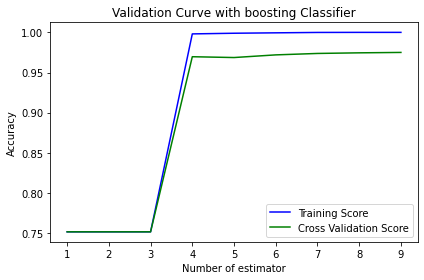

In [79]:
from sklearn.model_selection import validation_curve
parameter_range = np.arange(1, 10, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(clf, X_test_pca, y_testt,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                        cv = kf, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with boosting Classifier")
plt.xlabel("Number of estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [80]:
clf = GradientBoostingClassifier(n_estimators = 100, random_state = 0, max_depth=16, max_features = 'sqrt').fit(X_pca, y_trainn)

Text(33.0, 0.5, 'True labels')

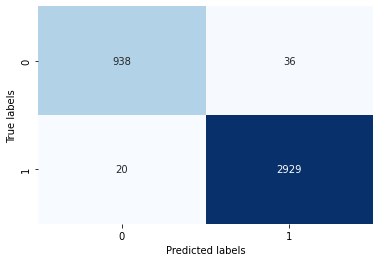

In [81]:
y_pred = clf.predict(X_test_pca)
ax = sns.heatmap(confusion_matrix(y_testt, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [82]:
print(classification_report(y_testt, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       974
           1       0.99      0.99      0.99      2949

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



In [83]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
cm2 = confusion_matrix(y_testt, y_pred)
print(cm2)

TN = cm2[0][0] * 100
FN = cm2[1][0] * 100
TP = cm2[1][1] * 100
FP = cm2[0][1] * 100

DR = TP / (TP+FN)
FAR = FP / (FP+TN)
print("Detection Rate:", DR)
print("False Alarm Rate", FAR)
print("Accuracy", accuracy_score(y_testt, y_pred))
print("Precision", precision_score(y_testt, y_pred))
print("Recall", recall_score(y_testt, y_pred))
print("F1-Score", f1_score(y_testt, y_pred))

[[ 938   36]
 [  20 2929]]
Detection Rate: 0.993218040013564
False Alarm Rate 0.03696098562628337
Accuracy 0.9857252102982411
Precision 0.987858347386172
Recall 0.993218040013564
F1-Score 0.9905309435238417


Text(0.5, 1.0, 'Features Yang digunakan')

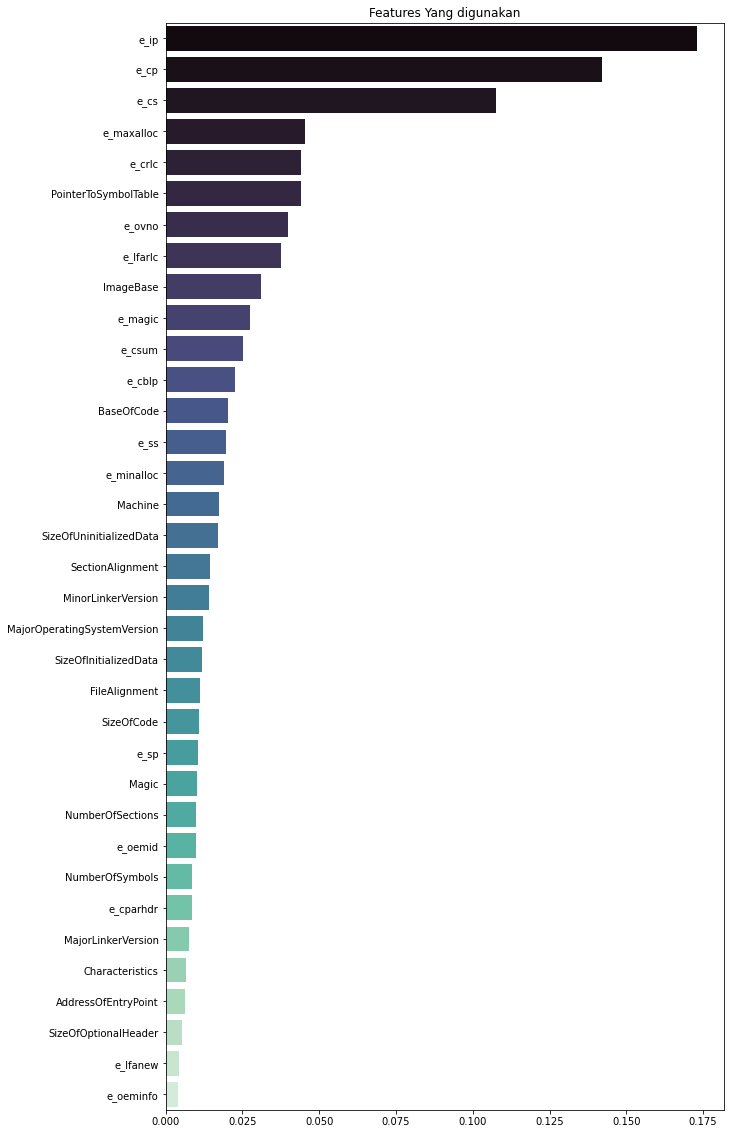

In [84]:
importance = clf.feature_importances_
importance_dict = {XX.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features Yang digunakan')

In [85]:
import joblib
import pickle
import pipes
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('scale', scaler),('pca', skpca), ('clf', model)])
#joblib.dumps(pipe, 'my_model.pkl')
pkl_filename = "../components/boostingscaler.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(scaler, file)
pkl_filename = "../components/boostingpca.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(skpca, file)
pkl_filename = "../components/boostingrf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

Prototype Fast-API

In [86]:
import aiofiles
import jinja2
from colabcode import ColabCode
import pefile
from fastapi import FastAPI
import multipart
from sklearn.pipeline import Pipeline
import pandas as pd
import os
import math
import numpy as np
from io import BytesIO
from keras.applications import imagenet_utils
import tensorflow as tf 
import itertools
import pefile
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import uvicorn
from fastapi import FastAPI, File, UploadFile
from starlette.responses import RedirectResponse
import cv2
import tempfile
import uvicorn
from tensorflow.keras.utils import img_to_array
from fastapi.templating import Jinja2Templates
from PIL import Image

In [87]:
cc = ColabCode(port=12000, code=False)
import joblib
import itertools

In [88]:
def createDataframeFromPEdump(pe):

	dosHeaders = ['e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
	       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
	       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew']
	fileHeaders=['Machine',
	       'NumberOfSections','PointerToSymbolTable',
	       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics']
	optionalHeaders=['Magic',
	       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
	       'SizeOfInitializedData', 'SizeOfUninitializedData','AddressOfEntryPoint', 'BaseOfCode',
	        'ImageBase', 'SectionAlignment','FileAlignment', 'MajorOperatingSystemVersion',
	       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
	       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
	       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
	       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
	       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes']


	dheaders = {}
	fheaders = {}
	oheaders={}
	imd1 = {}

	for x in dosHeaders:
		dheaders[x] = getattr(pe.DOS_HEADER,x)
	df = pd.DataFrame(dheaders,index=[0])

	for i in fileHeaders:
		fheaders[i] = getattr(pe.FILE_HEADER,i)
	df = pd.concat([df,(pd.DataFrame(fheaders,index=[0]))],axis=1)

	for y in optionalHeaders:
		oheaders[y] = getattr(pe.OPTIONAL_HEADER,y)
	df = pd.concat([df,(pd.DataFrame(oheaders,index=[0]))],axis=1)

	df = pd.concat([df,(pd.DataFrame(imd1,index=[0]))],axis=1)

	return df

def getPredictions(df):
    load_scaler = joblib.load(open(r'../components/boostingscaler.pkl','rb'))
    load_skpca = joblib.load(open(r'../components/boostingpca.pkl','rb'))
    load_model = joblib.load(open(r'../components/boostingrf_model.pkl','rb'))
    pipe = Pipeline([('scale', load_scaler),('pca', load_skpca),('rf_model', load_model)])
    df = np.array(df)
    df = df.reshape(1,-1)
    results = pipe.predict_proba(df)
    pred = pipe.predict(df)
    return (results[0],pred[0]) # membandingkan hasil prediksi machine x test dengan extraction data pe baru yg akan di uji, 
								# di beri 0 karena untuk mengeluarkan 1 hasil index prediksi

In [89]:
#creating fastApi app 
from fileinput import filename


app_desc = """<h2> Try uploading a Portable Executable(PE) file"""
app = FastAPI(description = app_desc)
templates = Jinja2Templates(directory="html")
@app.get("/",include_in_schema=False)
async def index():
	return RedirectResponse(url="/docs")

@app.post("/predict")
def parse(file: UploadFile = File(...)):
    extension = os.path.splitext(file.filename)[1]
    _, path = tempfile.mkstemp(prefix='parser_', suffix=extension)

    with open(path, 'ab') as f:
        for chunk in iter(lambda: file.file.read(10000), b''):
            f.write(chunk)

    # extract content
    content = pefile.PE(path,fast_load=True)
    dataframe = createDataframeFromPEdump(content)
    binary_preds = getPredictions(dataframe)
    if binary_preds[1] == 1:
       return {'Name file' : file.filename, 'response':'Malicious file','predictions':binary_preds[0][1]*100}
    else:
      return {'Name file' : file.filename, 'Response': 'Your file is same from malware.','Malicious percentage':binary_preds[0][1]*100}
    #remove temp file
    os.close(_)
    os.remove(path)

In [90]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://fb0f-36-72-207-77.ngrok.io" -> "http://localhost:12000"


INFO:     Started server process [348]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [348]
